## Preparing Dataset

In [2]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-rbpoixko
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-rbpoixko
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


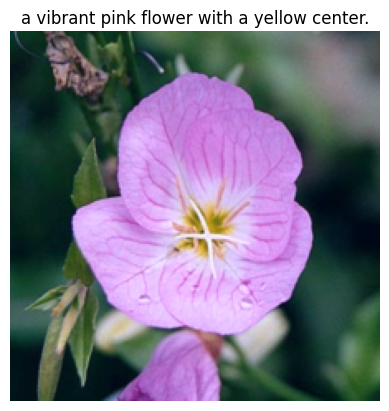

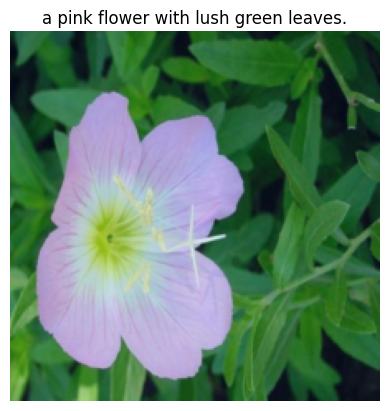

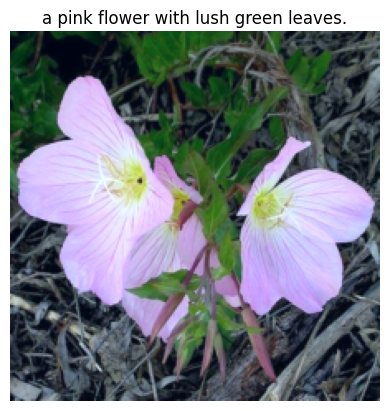

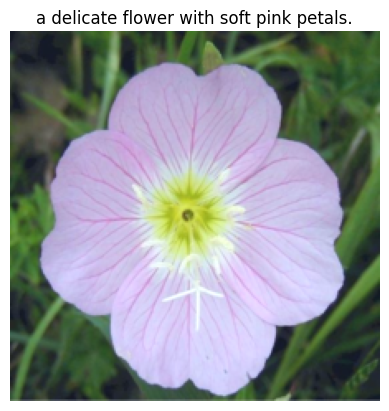

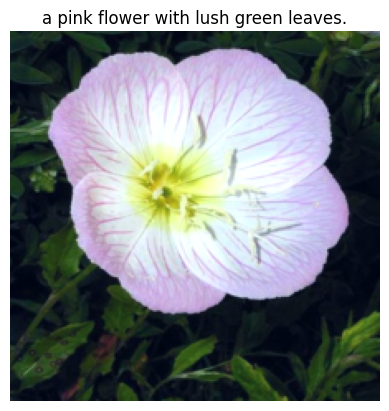

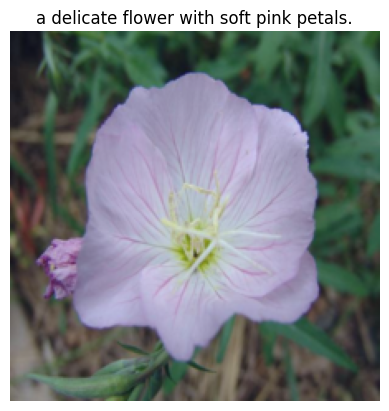

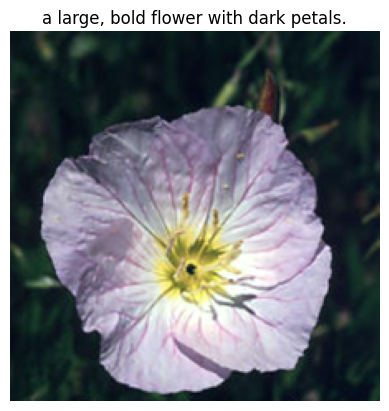

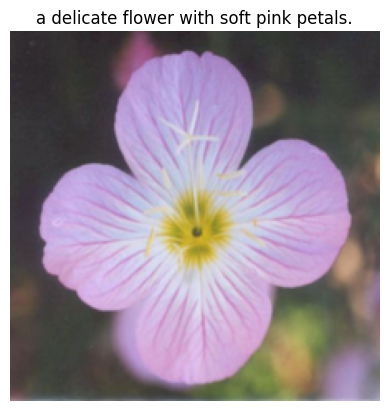

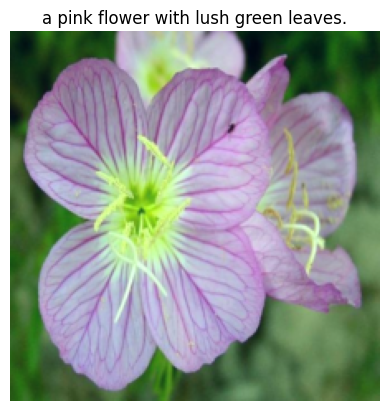

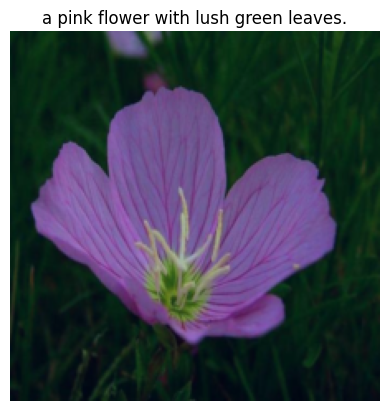

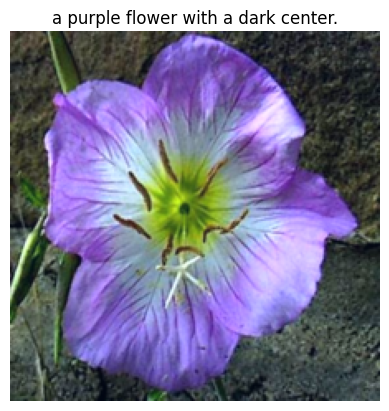

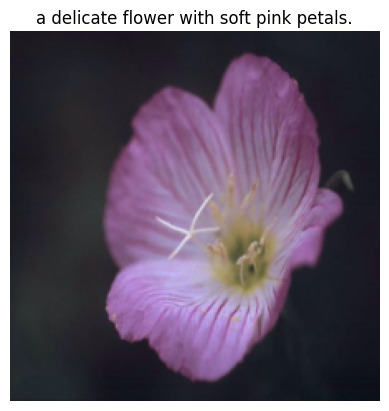

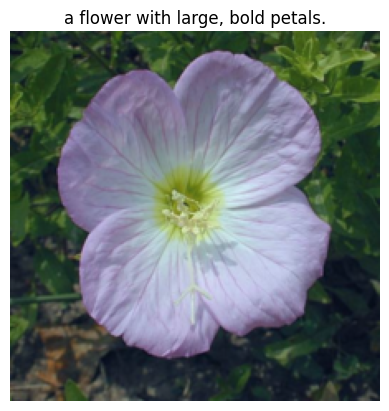

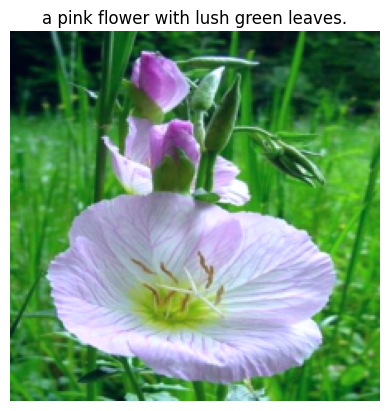

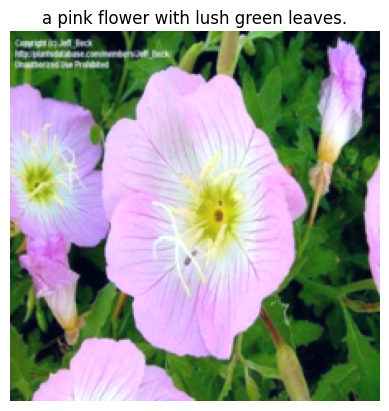

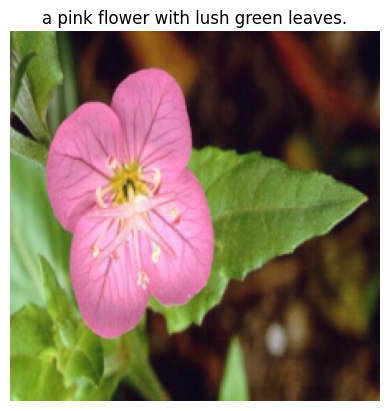

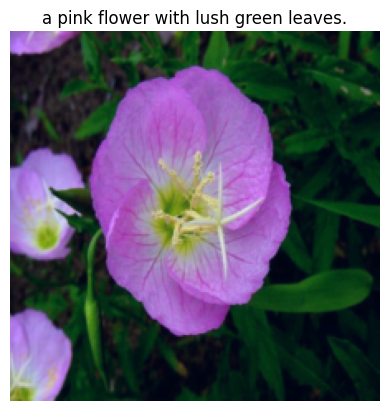

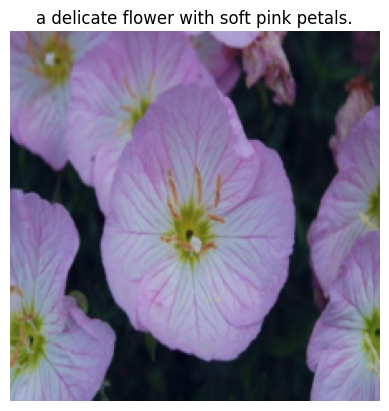

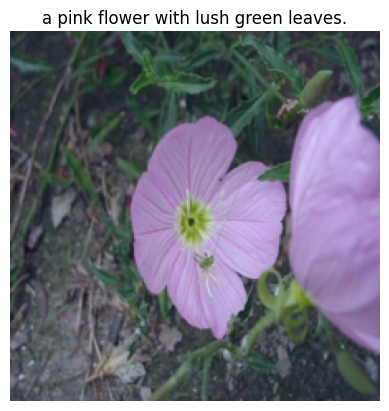

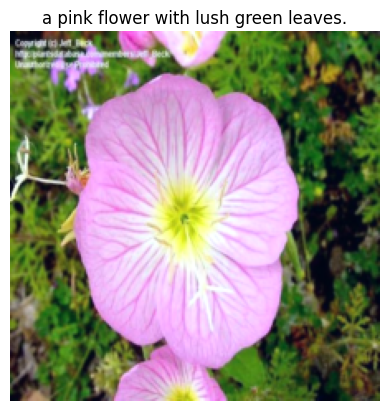

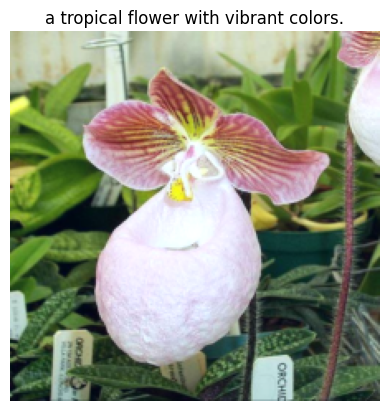

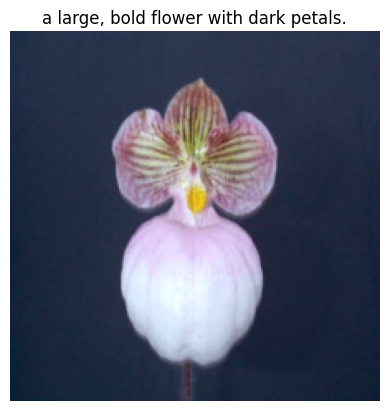

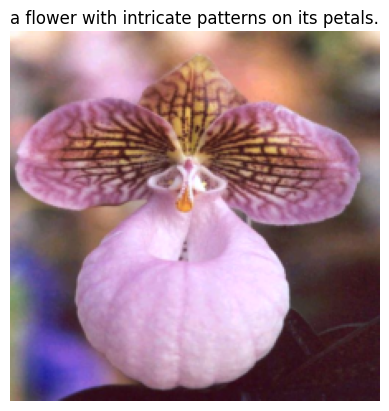

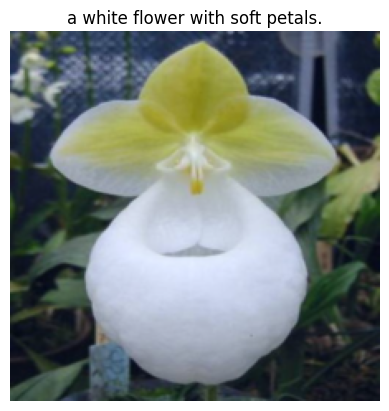

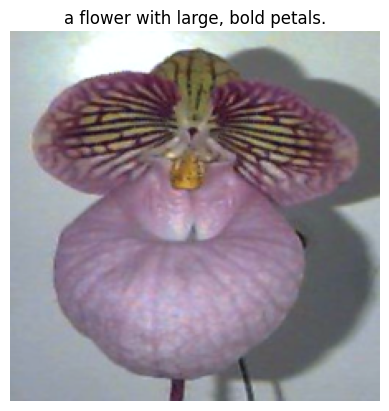

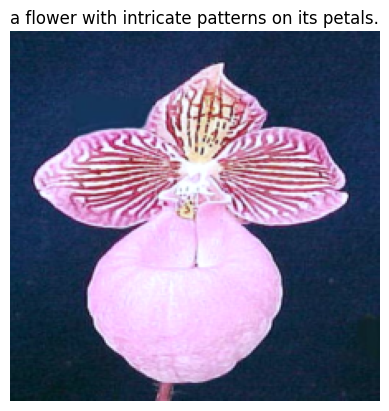

In [8]:
import torch
import clip
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Prepare the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

dataset = datasets.Flowers102(root="./data", split="test", download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Define candidate captions relevant to flowers
candidate_captions = [
    "a close-up of a beautiful flower.",
    "a vibrant flower in bloom.",
    "a photo of a colorful flower.",
    "a delicate flower with petals.",
    "a single flower standing out.",
    "a flower with intricate patterns on its petals.",
    "a flower with bright yellow petals.",
    "a white flower with soft petals.",
    "a red flower in full bloom.",
    "a purple flower with a dark center.",
    "a bunch of flowers in a garden.",
    "a close-up of a flower with dew drops.",
    "a pink flower with lush green leaves.",
    "a flower in a field of wildflowers.",
    "a tropical flower with vibrant colors.",
    "a beautiful flower with a yellow center.",
    "a flower with large, bold petals.",
    "a soft and delicate white flower.",
    "a close-up of a blooming flower.",
    "a bright orange flower with green leaves.",
    "a small flower among tall grass.",
    "a flower surrounded by greenery.",
    "a flower with purple petals and yellow stamens.",
    "a close-up of a flower in the sunlight.",
    "a vibrant pink flower with a yellow center.",
    "a flower with multi-colored petals.",
    "a flower growing in the wild.",
    "a close-up of a flower against a blue sky.",
    "a cluster of flowers in various shades.",
    "a delicate flower with soft pink petals.",
    "a flower with pointed petals.",
    "a blue flower blooming in the garden.",
    "a large, bold flower with dark petals.",
    "a tiny flower hidden among leaves.",
    "a flower with orange petals and a yellow center.",
    "a blooming flower in a natural setting.",
    "a white flower with yellow stamens.",
    "a flower with vibrant red petals.",
    "a close-up of a flower covered in raindrops.",
    "a flower standing tall in the garden."
]


# Encode the candidate captions
with torch.no_grad():
    text_features = clip.tokenize(candidate_captions).to(device)
    text_features = model.encode_text(text_features)
    text_features /= text_features.norm(dim=-1, keepdim=True)

# Function to generate captions
def generate_captions(image_features, text_features, candidate_captions):
    similarities = torch.matmul(image_features, text_features.T)
    best_caption_indices = similarities.argmax(dim=-1)
    best_captions = [candidate_captions[idx] for idx in best_caption_indices]
    return best_captions

# Function to display image with caption
def display_image_with_caption(image, caption):
    image = image.permute(1, 2, 0).cpu().numpy()
    image = image * 0.229 + 0.485  # Unnormalize the image
    plt.imshow(image)
    plt.title(caption)
    plt.axis('off')
    plt.show()

# Loop through the dataset, generate captions, and display images with captions
for i, (image, _) in enumerate(dataloader):
    image = image.to(device)
    with torch.no_grad():
        image_features = model.encode_image(image)
        image_features /= image_features.norm(dim=-1, keepdim=True)

    best_captions = generate_captions(image_features, text_features, candidate_captions)

    # Display the image with the generated caption
    display_image_with_caption(image.squeeze(0), best_captions[0])

    # Optionally, break after a few images to inspect the output
    if i >= 25:  # Adjust this number as needed
        break
